In [1]:
#author: Amelie Bauerdick
#Wabnitz Lab

# Import Packages

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
import umap
import pandas_bokeh
from sklearn.preprocessing import QuantileTransformer
 #Bokeh
from bokeh.io import show
from bokeh.models import Div, HoverTool, CustomJS, ColumnDataSource, Slider, Range1d,LinearColorMapper, DataTable, DateFormatter, TableColumn, BooleanFilter, CDSView, CategoricalColorMapper
from bokeh.palettes import RdBu3,all_palettes
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_file, save
from bokeh.layouts import column, row
from bokeh.transform import factor_cmap

output_notebook()

Loading BokehJS ...

# Load data 

In [3]:
data=pd.read_csv("path/DMAP_2.csv")
data

,Area_M01,Area_M02,Area_M06,Area_M07,Area_MC,Aspect_Ratio_M01,Aspect_Ratio_M02,Aspect_Ratio_M06,Aspect_Ratio_M07,Length_M01,...,cluster,file_name,index_file,donor,file_number,Intensity_MC_Ch02,Intensity_MC_Ch03,Intensity_MC_Ch04,Intensity_MC_Ch07,Intensity_MC_Ch11
0,0.342516,0.164913,0.193473,0.212997,0.157543,0.935770,0.895592,0.742653,0.828787,0.160920,...,6,CNR_GI_11,1,1,1,10592.503906,10829.438477,5573.332031,52029.429688,1970.516357
1,0.250000,0.226614,0.172203,0.194389,0.116379,0.899479,0.927894,0.797395,0.843540,0.137931,...,4,CNR_GI_11,3,1,1,21277.480469,4794.350586,5100.957520,57998.902344,4766.680664
2,0.351871,0.227182,0.303613,0.286001,0.187716,0.916088,0.912654,0.740706,0.853506,0.160920,...,2,CNR_GI_11,4,1,1,56849.820312,10702.029297,11052.336914,23129.652344,23753.763672
3,0.357588,0.234291,0.164044,0.098769,0.146121,0.911297,0.945467,0.568358,0.966592,0.160920,...,8,CNR_GI_11,5,1,1,86099.359375,3457.183838,4277.188965,53895.714844,28729.251953
4,0.370062,0.261018,0.197844,0.153163,0.158621,0.681898,0.778701,0.983908,0.704950,0.229885,...,4,CNR_GI_11,6,1,1,37848.769531,31435.689453,14425.722656,66010.875000,28717.539062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.193347,0.176571,0.173951,0.127111,0.096767,0.914403,0.953054,0.695463,0.851317,0.103448,...,6,SHE_GI_h2o2_10,17523,3,3,26087.253906,10660.279297,7312.406738,50993.730469,3459.491455
62996,0.270270,0.208132,0.204545,0.153736,0.129310,0.875433,0.899321,0.664939,0.770080,0.149425,...,1,SHE_GI_h2o2_10,17525,3,3,9874.682617,31397.998047,14638.154297,58063.457031,4818.807129
62997,0.413721,0.267558,0.302448,0.284283,0.193534,0.948950,0.938887,0.811283,0.923806,0.195402,...,2,SHE_GI_h2o2_10,17526,3,3,29239.488281,9218.439453,13230.167969,38974.808594,37365.039062
62998,0.181913,0.183964,0.159382,0.101918,0.073491,0.946111,0.921682,0.770323,0.918921,0.080460,...,8,SHE_GI_h2o2_10,17528,3,3,8336.823242,4749.646973,4774.823730,51944.234375,16201.823242


In [4]:
x= data[['x']].copy()
y= data[['y']].copy()
cluster= data[['cluster']].copy()

In [5]:
list(data.columns)

['Area_M01',
 'Area_M02',
 'Area_M06',
 'Area_M07',
 'Area_MC',
 'Aspect_Ratio_M01',
 'Aspect_Ratio_M02',
 'Aspect_Ratio_M06',
 'Aspect_Ratio_M07',
 'Length_M01',
 'Length_M02',
 'Length_M06',
 'Length_M07',
 'Width_M01',
 'Width_M02',
 'Width_M06',
 'Width_M07',
 'Height_M01',
 'Height_M02',
 'Height_M06',
 'Height_M07',
 'Circularity_Morphology(M07__Ch07)',
 'Delta_Centroid_XY',
 'Circularity_M01',
 'Diameter_M01',
 'Perimeter_M01',
 'Symmetry_3_M01_Ch07',
 'Ratio_cell/nucleus',
 'Lobe_Count_Morphology(M07__Ch07)_Ch07',
 'Major_Axis_MC',
 'Cytoplasmic_size',
 'Similarity_MC_Ch02_Ch07',
 'Circularity_MC',
 'Major_Axis_M02',
 'Cortical_F_actin_(%)',
 'Nuclear_F_actin',
 'Shape_Ratio_M01',
 'Area_Cytoplasm',
 'x',
 'y',
 'cluster',
 'file_name',
 'index_file',
 'donor',
 'file_number',
 'Intensity_MC_Ch02',
 'Intensity_MC_Ch03',
 'Intensity_MC_Ch04',
 'Intensity_MC_Ch07',
 'Intensity_MC_Ch11']

# Plot Cluster

In [6]:
datasum=data[['cluster','file_number','donor']].copy()

In [7]:
datasum.count()

cluster        63000
file_number    63000
donor          63000
dtype: int64

In [8]:
grouped_df = datasum.groupby(['cluster','file_number','donor'])['donor'].count()
grouped_df.reset_index(name="count")

,cluster,file_number,donor,count
0,0,1,1,447
1,0,1,2,376
2,0,1,3,552
3,0,2,1,973
4,0,2,2,951
...,...,...,...,...
76,8,2,2,117
77,8,2,3,122
78,8,3,1,1752
79,8,3,2,1544


In [9]:
print(type(grouped_df)) 

<class 'pandas.core.series.Series'>


In [10]:
grouped_df.to_csv('path/data.csv')

In [11]:
grouped_df2 = datasum.groupby(['cluster','file_number'])['file_number'].count()
grouped_df2.reset_index(name="count")

,cluster,file_number,count
0,0,1,1375
1,0,2,2757
2,0,3,1460
3,1,1,2199
4,1,2,2501
5,1,3,2166
6,2,1,2388
7,2,2,564
8,2,3,2468
9,3,1,1073


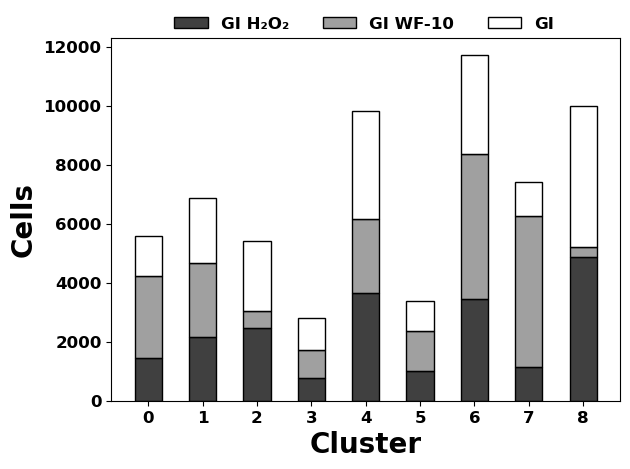

In [12]:
ax = sns.histplot(data=grouped_df2.reset_index(name="count"), 
                  x='cluster',
                  hue='file_number',
                  weights='count', 
                  discrete=True, 
                  multiple='stack', 
                  palette=['white','gray','black'],
                  legend=False, 
                  stat='count',
                  shrink=0.5,
                  binwidth=0,
                 )

plt.rcParams["patch.force_edgecolor"] = True
#ax.legend(frameon=False)
plt.legend(title='', 
           bbox_to_anchor=(0.9, 1.1), 
           labels=[ 'GI H\u2082O\u2082','GI WF-10','GI'],
           fontsize=12,
           frameon=False,
           ncol=3
          )

ax.set_xlabel('Cluster', fontsize=20)
ax.set_ylabel('Cells', fontsize=20)
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 
plt.tight_layout()

plt.savefig('png/cluster_dmap.png',dpi=300, bbox_inches='tight')

plt.show()

# Most Important Features

In [15]:
datafinal=data.copy()
datafinal=datafinal[[     

'Area_M01',    
'Length_M01',    
'Width_M01', 
'Circularity_M01',
'Diameter_M01',
'Aspect_Ratio_M01',
'Shape_Ratio_M01',
    
'Major_Axis_MC',
'Circularity_MC',

'Area_M07',
'Length_M07',    
'Aspect_Ratio_M07',
'Lobe_Count_Morphology(M07__Ch07)_Ch07',
'Area_Cytoplasm'
        
]]

datafinal

,Area_M01,Length_M01,Width_M01,Circularity_M01,Diameter_M01,Aspect_Ratio_M01,Shape_Ratio_M01,Major_Axis_MC,Circularity_MC,Area_M07,Length_M07,Aspect_Ratio_M07,Lobe_Count_Morphology(M07__Ch07)_Ch07,Area_Cytoplasm
0,0.342516,0.160920,0.425926,0.298490,0.437206,0.935770,0.788925,0.125297,0.303220,0.212997,0.33,0.828787,0.75,0.207749
1,0.250000,0.137931,0.351852,0.364627,0.335837,0.899479,0.780524,0.099855,0.445205,0.194389,0.32,0.843540,0.50,0.190381
2,0.351871,0.160920,0.425926,0.427305,0.446998,0.916088,0.889737,0.169934,0.222265,0.286001,0.36,0.853506,0.25,0.408150
3,0.357588,0.160920,0.425926,0.494819,0.452944,0.911297,0.889737,0.122666,0.476875,0.098769,0.21,0.966592,0.25,0.496994
4,0.370062,0.229885,0.351852,0.120518,0.465821,0.681898,0.461285,0.169508,0.141543,0.153163,0.31,0.704950,0.50,0.383434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.193347,0.103448,0.314815,0.413269,0.269025,0.914403,0.795034,0.087184,0.465800,0.127111,0.25,0.851317,0.75,0.215765
62996,0.270270,0.149425,0.351852,0.355480,0.358806,0.875433,0.810722,0.115209,0.264110,0.153736,0.30,0.770080,1.00,0.269205
62997,0.413721,0.195402,0.481481,0.360306,0.509892,0.948950,0.823348,0.148805,0.583015,0.284283,0.37,0.923806,0.25,0.321309
62998,0.181913,0.080460,0.314815,0.481618,0.255026,0.946111,0.909249,0.064099,0.491716,0.101918,0.21,0.918921,0.25,0.277221


In [16]:
list(datafinal.columns)

['Area_M01',
 'Length_M01',
 'Width_M01',
 'Circularity_M01',
 'Diameter_M01',
 'Aspect_Ratio_M01',
 'Shape_Ratio_M01',
 'Major_Axis_MC',
 'Circularity_MC',
 'Area_M07',
 'Length_M07',
 'Aspect_Ratio_M07',
 'Lobe_Count_Morphology(M07__Ch07)_Ch07',
 'Area_Cytoplasm']

# Rename Features

In [17]:
columns_labels = { 

'Area_M01':'Area Cell',   
'Height_M01':'Height Cell',
'Length_M01':'Length Cell',
'Width_M01':'Width Cell',
'Diameter_M01':'Diameter Cell',
'Perimeter_M01':'Perimeter Cell',
'Aspect_Ratio_M01':'AR Cell',
'Shape_Ratio_M01':'SR Cell',  
'Circularity_M01':'Circularity Cell',
'Major_Axis_MC':'Major Axis MC', 
'Circularity_MC':'Circularity MC',
'Area_M07':'Area Nucleus',
'Length_M07':'Length Nucleus',
'Aspect_Ratio_M07':'AR Nucleus',
'Lobe_Count_Morphology(M07__Ch07)_Ch07':'Lobe Count Nucleus',  
'Area_Cytoplasm':'Area Cytoplasm'
    
}

datafinal.rename(columns= columns_labels, inplace=True)
datafinal

,Area Cell,Length Cell,Width Cell,Circularity Cell,Diameter Cell,AR Cell,SR Cell,Major Axis MC,Circularity MC,Area Nucleus,Length Nucleus,AR Nucleus,Lobe Count Nucleus,Area Cytoplasm
0,0.342516,0.160920,0.425926,0.298490,0.437206,0.935770,0.788925,0.125297,0.303220,0.212997,0.33,0.828787,0.75,0.207749
1,0.250000,0.137931,0.351852,0.364627,0.335837,0.899479,0.780524,0.099855,0.445205,0.194389,0.32,0.843540,0.50,0.190381
2,0.351871,0.160920,0.425926,0.427305,0.446998,0.916088,0.889737,0.169934,0.222265,0.286001,0.36,0.853506,0.25,0.408150
3,0.357588,0.160920,0.425926,0.494819,0.452944,0.911297,0.889737,0.122666,0.476875,0.098769,0.21,0.966592,0.25,0.496994
4,0.370062,0.229885,0.351852,0.120518,0.465821,0.681898,0.461285,0.169508,0.141543,0.153163,0.31,0.704950,0.50,0.383434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.193347,0.103448,0.314815,0.413269,0.269025,0.914403,0.795034,0.087184,0.465800,0.127111,0.25,0.851317,0.75,0.215765
62996,0.270270,0.149425,0.351852,0.355480,0.358806,0.875433,0.810722,0.115209,0.264110,0.153736,0.30,0.770080,1.00,0.269205
62997,0.413721,0.195402,0.481481,0.360306,0.509892,0.948950,0.823348,0.148805,0.583015,0.284283,0.37,0.923806,0.25,0.321309
62998,0.181913,0.080460,0.314815,0.481618,0.255026,0.946111,0.909249,0.064099,0.491716,0.101918,0.21,0.918921,0.25,0.277221


# Correlation Matrix

In [ ]:
sns.set(font_scale=2.5)
plt.subplots(figsize=(25,20))

s=sns.heatmap(datafinal.corr(), annot = True,cmap='rocket')
s.set_yticklabels(labels=datafinal.corr(), size = 40)
s.set_xticklabels(labels=datafinal.corr(), size = 40)
plt.xticks(rotation=45,ha='right')
plt.savefig('png/dmap_correlation.png',dpi=300, bbox_inches='tight')

# Heatmap

In [19]:
frames=[datafinal,cluster]
datafinal=pd.concat(frames, axis=1)

In [20]:
heatmap=datafinal.copy()
heatmapfinal=heatmap.groupby(['cluster']).mean()

In [21]:
scaled_df = (heatmapfinal - heatmapfinal.min(axis=0))/(heatmapfinal.max(axis=0) - heatmapfinal.min(axis=0))
scaled_df

,Area Cell,Length Cell,Width Cell,Circularity Cell,Diameter Cell,AR Cell,SR Cell,Major Axis MC,Circularity MC,Area Nucleus,Length Nucleus,AR Nucleus,Lobe Count Nucleus,Area Cytoplasm
cluster,,,,,,,,,,,,,,
0,0.820343,0.839460,0.452435,0.050620,0.822875,0.223691,0.070120,0.806475,0.052194,0.796369,0.534637,0.283566,0.333333,0.349318
1,0.148292,0.183184,0.010487,0.566806,0.154968,0.726712,0.756508,0.153981,0.640888,0.322250,0.306790,0.477521,1.000000,0.103739
2,0.450044,0.421974,0.356371,0.458493,0.447838,0.713844,0.447867,0.381922,0.421413,0.983759,0.302686,0.950530,0.000000,0.124048
3,0.448787,0.941155,0.519649,0.127603,0.406668,0.095016,0.000000,0.975159,0.081842,0.133944,1.000000,0.072790,0.690502,1.000000
4,0.170390,0.183428,0.016830,0.619630,0.178194,0.738299,0.804524,0.170767,0.683289,0.320514,0.313286,0.411098,0.333333,0.031917
5,0.794692,0.963483,1.000000,0.140012,0.779839,0.256438,0.056400,0.963024,0.078085,0.851059,0.480334,0.431277,0.579036,0.556050
6,0.379594,0.350207,0.211058,0.436758,0.386584,0.648436,0.571941,0.321934,0.492770,0.480097,0.304828,0.627009,0.666667,0.146758
7,1.000000,1.000000,0.374594,0.000000,1.000000,0.000000,0.056212,1.000000,0.000000,1.000000,0.811105,0.000000,1.000000,0.486356
8,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [ ]:
sns.set(font_scale=2)
corr=scaled_df.head(124)
heat = sns.clustermap(scaled_df, 
                      figsize=(19, 10),
                      cmap='rocket', 
                      vmin=0, 
                      vmax=1,
                      xticklabels=True, 
                      yticklabels=True, 
                      annot=True,
                      fmt=".2f"
                     )
heat.ax_cbar.set_position((1, .2, .03, .2))
plt.setp(heat.ax_heatmap.yaxis.get_majorticklabels(), rotation=0) 
plt.setp(heat.ax_heatmap.xaxis.get_majorticklabels(), rotation=45, ha='right') 

plt.savefig('png/dmap_heatmap.png',dpi=300, bbox_inches='tight')
plt.show()

# DensMAPs

In [23]:
def scaler(df):
    scaler = QuantileTransformer(output_distribution='uniform')
    for column in df.columns:
        scaled_column = scaler.fit_transform(df[[column]])
        df[column] = scaled_column.flatten()  # Flatten, um die Dimensionen anzupassen
    return df

In [24]:
scaler(datafinal)

,Area Cell,Length Cell,Width Cell,Circularity Cell,Diameter Cell,AR Cell,SR Cell,Major Axis MC,Circularity MC,Area Nucleus,Length Nucleus,AR Nucleus,Lobe Count Nucleus,Area Cytoplasm,cluster
0,0.566066,0.400901,0.728729,0.653404,0.566066,0.825836,0.664164,0.370316,0.706227,0.816817,0.729730,0.457925,0.629630,0.140641,0.630130
1,0.261762,0.266266,0.343343,0.751108,0.261762,0.677766,0.644144,0.183613,0.893401,0.727227,0.676677,0.497633,0.388388,0.100601,0.405906
2,0.595596,0.400901,0.728729,0.831575,0.595596,0.744677,0.968969,0.659038,0.535472,0.966466,0.851852,0.526658,0.129630,0.825826,0.240741
3,0.612613,0.400901,0.728729,0.903447,0.612613,0.724424,0.968969,0.350040,0.919724,0.046046,0.037037,0.917029,0.129630,0.945445,1.000000
4,0.649650,0.704204,0.343343,0.287825,0.649650,0.187761,0.280280,0.656902,0.326018,0.426426,0.617117,0.198084,0.388388,0.766266,0.405906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.114114,0.095095,0.168669,0.814112,0.114114,0.737329,0.676677,0.106790,0.911478,0.209710,0.212212,0.520292,0.629630,0.162663,0.630130
62996,0.323824,0.333834,0.343343,0.738388,0.323824,0.590051,0.721221,0.293346,0.628005,0.431932,0.553053,0.317930,1.000000,0.351852,0.143143
62997,0.761762,0.575075,0.888388,0.745075,0.761762,0.878986,0.760260,0.537170,0.973626,0.964965,0.880380,0.752683,0.129630,0.559059,0.240741
62998,0.092317,0.032032,0.168669,0.890974,0.092317,0.867629,0.979980,0.026854,0.929742,0.057558,0.037037,0.736363,0.129630,0.383383,1.000000


In [25]:
def dmap(feature):

 source=ColumnDataSource(datafinal)

 cm = LinearColorMapper( palette='Plasma256',             
                         low = min(datafinal[feature]),
                         high = max(datafinal[feature]) 
                       )     


 tools_emb = ['save']

 dmap = figure(plot_width=500,
                  plot_height=500, 
                  tools=tools_emb,
                  title=feature
              )
    
 dmap.circle('x', 'y',
                size=1, 
                fill_color={"field":feature, "transform":cm},
                alpha=1, 
                line_alpha=1, 
                line_width=0.03, 
                source=source, 
                name="datafinal", 
               )

 dmap.x_range = Range1d(-10, 20)
 dmap.y_range = Range1d(-5, 20)
 dmap.title.align = 'center'
 dmap.grid.visible = False
 dmap.axis.visible = False
 dmap.outline_line_color= None
 dmap.border_fill_color = None

 dmap.title.text_font_size = '33pt'
    
 show(dmap)

In [26]:
list(datafinal.columns)

['Area Cell',
 'Length Cell',
 'Width Cell',
 'Circularity Cell',
 'Diameter Cell',
 'AR Cell',
 'SR Cell',
 'Major Axis MC',
 'Circularity MC',
 'Area Nucleus',
 'Length Nucleus',
 'AR Nucleus',
 'Lobe Count Nucleus',
 'Area Cytoplasm',
 'cluster']

In [27]:
frames=[datafinal,x,y]
datafinal=pd.concat(frames, axis=1)
datafinal

,Area Cell,Length Cell,Width Cell,Circularity Cell,Diameter Cell,AR Cell,SR Cell,Major Axis MC,Circularity MC,Area Nucleus,Length Nucleus,AR Nucleus,Lobe Count Nucleus,Area Cytoplasm,cluster,x,y
0,0.566066,0.400901,0.728729,0.653404,0.566066,0.825836,0.664164,0.370316,0.706227,0.816817,0.729730,0.457925,0.629630,0.140641,0.630130,-5.459469,3.202184
1,0.261762,0.266266,0.343343,0.751108,0.261762,0.677766,0.644144,0.183613,0.893401,0.727227,0.676677,0.497633,0.388388,0.100601,0.405906,5.942836,-2.001893
2,0.595596,0.400901,0.728729,0.831575,0.595596,0.744677,0.968969,0.659038,0.535472,0.966466,0.851852,0.526658,0.129630,0.825826,0.240741,14.006806,9.517039
3,0.612613,0.400901,0.728729,0.903447,0.612613,0.724424,0.968969,0.350040,0.919724,0.046046,0.037037,0.917029,0.129630,0.945445,1.000000,12.532027,12.132422
4,0.649650,0.704204,0.343343,0.287825,0.649650,0.187761,0.280280,0.656902,0.326018,0.426426,0.617117,0.198084,0.388388,0.766266,0.405906,5.099331,1.915740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.114114,0.095095,0.168669,0.814112,0.114114,0.737329,0.676677,0.106790,0.911478,0.209710,0.212212,0.520292,0.629630,0.162663,0.630130,-7.345201,4.255477
62996,0.323824,0.333834,0.343343,0.738388,0.323824,0.590051,0.721221,0.293346,0.628005,0.431932,0.553053,0.317930,1.000000,0.351852,0.143143,-0.547038,17.289040
62997,0.761762,0.575075,0.888388,0.745075,0.761762,0.878986,0.760260,0.537170,0.973626,0.964965,0.880380,0.752683,0.129630,0.559059,0.240741,14.259687,10.001140
62998,0.092317,0.032032,0.168669,0.890974,0.092317,0.867629,0.979980,0.026854,0.929742,0.057558,0.037037,0.736363,0.129630,0.383383,1.000000,12.261452,13.648517


In [ ]:
dmap('Area Cell'),
dmap('Length Cell'),
dmap('Width Cell'),
dmap('Circularity Cell'),
dmap('Diameter Cell'),
dmap('AR Cell'),
dmap('SR Cell'),
dmap('Major Axis MC'),
dmap('Circularity MC',)
dmap('Area Nucleus'),
dmap('Length Nucleus'),
dmap('AR Nucleus'),
dmap('Lobe Count Nucleus'),
dmap('Area Cytoplasm')